In [8]:
import glob
import os
from matplotlib import pyplot as plt
import torch

from monai.transforms import (
    AsDiscrete,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandCropByPosNegLabeld,
    ScaleIntensityRanged,
    Spacingd,
    EnsureType,
    RandAffined,
    RandRotated,
    RandFlipd,
    Rand3DElasticd,
    ResizeWithPadOrCropd
)

In [9]:
task_name = "Task01_pancreas"
network_name = "UNet"

directory = os.environ.get("MONAI_DATA_DIRECTORY")
data_dir = os.path.join(directory, task_name)
persistent_cache = os.path.join(data_dir, "persistent_cache")
tensorboard_dir = os.path.join("../runs", f"{task_name}")
cuda = torch.device("cuda:0")

In [10]:
preprocess_transforms = Compose(
    [
        # LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        ScaleIntensityRanged(
            keys=["image"], a_min=-150, a_max=150, b_min=0.0, b_max=1.0, clip=True,
        ),
        CropForegroundd(keys=["image", "label"], source_key="image"),
    ]
)

li = LoadImaged(keys=["image", "label"])

In [22]:
train_images = sorted(glob.glob(os.path.join(data_dir, "img", "*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "pancreas_seg", "*.nii.gz")))
data_dicts = [
    {"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)
]  # 注意到data_dicts是一个数组

In [23]:
image, label = data_dicts[0]["image"], data_dicts[0]["label"]

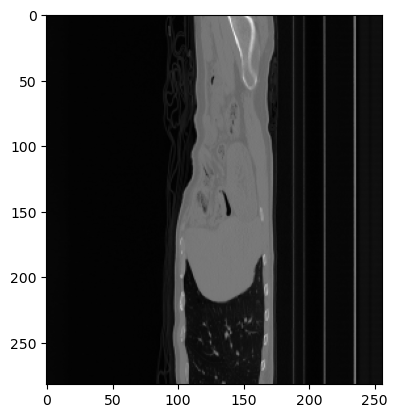

In [35]:
from scipy import ndimage
import SimpleITK as sitk

image = sitk.ReadImage(data_dicts[0]["image"])
origin = (0,0,0)
spacing = (1.5, 1.5, 3.0)
direction = (1,0,0,0,1,0,0,0,1)
image_array = sitk.GetArrayFromImage(image)
img_arr_zom = ndimage.zoom(image_array, (1, 0.5, 0.5), order=3)
plt.imshow(img_arr_zom[:,:,100], cmap="gray")
plt.show()

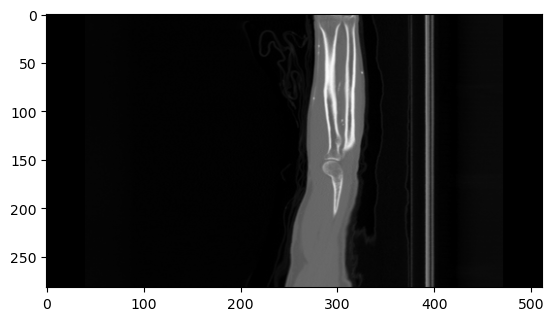

In [31]:
plt.imshow(image_array[:,:,100], cmap="gray")

In [36]:
img_arr_zom.shape

(282, 256, 256)

In [37]:
image_array.shape

(282, 512, 512)